_________________________________________________

### FEATURE ENGINEERING

In [869]:
import pandas as pd
clean_df= pd.read_csv('part_1.csv')
clean_df.drop('Unnamed: 0',inplace = True,axis = 1)
clean_df.head(3)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,month,hour,sense_dummy,text_len,day,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic
0,TheSkubis,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,@VerizonSupport I have issues with closed capt...,issue closed caption walking dead show display...,-0.150,1,3,23,-1,51,1,30,evening,86359,-0.002982,0.999996,"['issue', 'closed', 'caption', 'walking', 'dea...",14
1,VerizonSupport,verizonsupport,NaN,2021-03-30 23:56:55,@_carolinek This could be due to regional rest...,this could due regional restriction have check...,-0.125,1,3,23,-1,52,1,30,evening,86215,-0.013453,0.999910,"['this', 'could', 'due', 'regional', 'restrict...",2
2,VerizonSupport,verizonsupport,NaN,2021-03-30 23:55:30,@tvmurray We'll be happy to help with anything...,happy help anything related fios twitter pleas...,0.400,0,3,23,1,63,1,30,evening,86130,-0.019634,0.999807,"['happy', 'help', 'anything', 'related', 'fios...",9


In [870]:
# убираем пустые строки
clean_df = clean_df[~clean_df.clean_text.isnull()]
clean_df.shape

(638, 20)

In [871]:
# 1. drop duplicates

clean_df = clean_df.drop_duplicates('clean_text')
clean_df.shape

(531, 20)

In [872]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# благодаря параметру max_features мы оставляем 80% самых выжных фичей
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),max_features = int(0.8 * 4309))
final_tf_idf = tf_idf_vect.fit_transform(clean_df['clean_text'].values)

final_tf_idf.shape

(531, 3447)

In [873]:
# начинаем создавать матрицу фичей

# добавление tfidf в нашу матрицу фичей 
feature_names = tf_idf_vect.get_feature_names()
feature_df = pd.DataFrame(final_tf_idf.toarray(), columns = feature_names)
feature_df.shape

(531, 3447)

In [874]:
# clean_df['clean_text'][0]

In [875]:
# кумулятивный вес слова - оставить только те слова, которые суммарно приносят 80% идф
# accum = feature_df.transpose()
# words = [] 
# accum = accum[accum[0] !=0]
# accum
# accum['%'] = accum[0]/accum[0].sum()
# start = 0
# accum['plus'] = accum['%'].cumsum()
# accum = accum[accum['plus']<0.8]
# accum

In [876]:
# вероятность городов
def city_proba(city):
    if type(city) != str:
        return clean_df[clean_df['location'].isna()]['location'].shape[0]/clean_df.shape[0]
    else:
        proba = clean_df.location.value_counts()/clean_df.shape[0]
    return proba[city]

city_proba('Stockholm, Sweden')


0.03766478342749529

In [877]:
# проверка количества строк
# clean_df[clean_df['location'].isna()]['location'].shape[0]+clean_df.location.value_counts().sum()

In [878]:
# добавляем вероятность городов в clean_df и в матрицу фичей
clean_df['location_proba'] = clean_df['location'].apply(lambda x:city_proba(x))
location_proba = list(clean_df['location_proba'])
feature_df['location_proba'] = location_proba



In [879]:
feature_df[feature_df['location_proba'].isna()].shape

(0, 3448)

### RFM analysis

In [880]:
clean_df.head(3)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,month,hour,...,text_len,day,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic,location_proba
0,TheSkubis,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,@VerizonSupport I have issues with closed capt...,issue closed caption walking dead show display...,-0.150,1,3,23,...,51,1,30,evening,86359,-0.002982,0.999996,"['issue', 'closed', 'caption', 'walking', 'dea...",14,0.003766
1,VerizonSupport,verizonsupport,NaN,2021-03-30 23:56:55,@_carolinek This could be due to regional rest...,this could due regional restriction have check...,-0.125,1,3,23,...,52,1,30,evening,86215,-0.013453,0.999910,"['this', 'could', 'due', 'regional', 'restrict...",2,0.425612
2,VerizonSupport,verizonsupport,NaN,2021-03-30 23:55:30,@tvmurray We'll be happy to help with anything...,happy help anything related fios twitter pleas...,0.400,0,3,23,...,63,1,30,evening,86130,-0.019634,0.999807,"['happy', 'help', 'anything', 'related', 'fios...",9,0.425612


In [881]:
feature_df.head(3)

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,youtube,youtube where,ypr,ypr yard,yr,yr ago,zip,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003766
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425612
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425612


In [882]:
import datetime as dt
import re
clean_df['date'] = clean_df['date_time'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
clean_df['date'] = clean_df['date'].apply(dt.datetime.date)
clean_df.head(1)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,month,hour,...,day,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic,location_proba,date
0,TheSkubis,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,@VerizonSupport I have issues with closed capt...,issue closed caption walking dead show display...,-0.15,1,3,23,...,1,30,evening,86359,-0.002982,0.999996,"['issue', 'closed', 'caption', 'walking', 'dea...",14,0.003766,2021-03-30


In [883]:
recency = list(clean_df['date'].apply(lambda x: dt.date.today() - x))
recency
feature_df['recency'] = recency
feature_df['recency'] = feature_df['recency'].apply(lambda x: int(str(x).split()[0]))
feature_df[feature_df['recency'] == 'NaT']

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,youtube where,ypr,ypr yard,yr,yr ago,zip,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba,recency


In [884]:
# feature_df[feature_df['location_proba'].isna()]

In [885]:
# feature_df['frequency'] = f
frequency = list(clean_df['screen_name'].apply(lambda x: clean_df[clean_df['screen_name'] == x].shape[0]))
feature_df['frequency'] = frequency
clean_df['frequency'] = clean_df['screen_name'].apply(lambda x: clean_df[clean_df['screen_name'] == x].shape[0])

In [886]:
monetary = list(clean_df['polarity'])
feature_df['monetary'] = monetary
feature_df.head(3)

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,ypr yard,yr,yr ago,zip,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba,recency,frequency,monetary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003766,19,1,-0.150
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.425612,19,37,-0.125
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.425612,19,37,0.400


In [887]:
# recency
r_q3 = feature_df['recency'].quantile(0.3)
r_q6 = feature_df['recency'].quantile(0.6)

feature_df['r'] = feature_df['recency'].apply(lambda x: 1 if x < r_q3 else(2 if r_q3<x<r_q6 else 3)  )
# frequency
f_q3 = feature_df['frequency'].quantile(0.3)
f_q6 = feature_df['frequency'].quantile(0.6)

feature_df['f'] = feature_df['frequency'].apply(lambda x: 1 if x < f_q3 else(2 if f_q3<x<f_q6 else 3)  )

# monetary
m_q3 = feature_df['monetary'].quantile(0.3)
m_q6 = feature_df['monetary'].quantile(0.6)

feature_df['m'] = feature_df['monetary'].apply(lambda x: 1 if x < m_q3 else(2 if m_q3<x<m_q6 else 3)  )
feature_df['rfm'] = feature_df['r']*100 + feature_df['f']*10 + feature_df['m']

In [888]:
feature_df.drop(['r','f','m'],inplace = True,axis = 1)
feature_df.drop(['recency','frequency','monetary'],inplace = True,axis = 1)
feature_df.head(3)

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,youtube where,ypr,ypr yard,yr,yr ago,zip,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba,rfm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003766,331
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425612,331
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425612,333


In [889]:
# добавим метрики, которые можно было бы использовать для кластеризации
sin  = list(clean_df['sin_time'])
cos = list(clean_df['cos_time'])
text_len  = list(clean_df['text_len'])
topic = list(clean_df['topic'])
fact = list(clean_df['fact'])

feature_df['sin_time'] = sin
feature_df['cos_time'] = cos
feature_df['text_len'] = text_len
feature_df['topic'] = topic
feature_df['fact'] = fact

In [890]:
polarity  = list(clean_df['polarity'])
feature_df['polarity'] = polarity            

In [891]:
# наша матрица фичей
feature_df.head()

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba,rfm,sin_time,cos_time,text_len,topic,fact,polarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.003766,331,-0.002982,0.999996,51,14,1,-0.150
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,331,-0.013453,0.999910,52,2,1,-0.125
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,333,-0.019634,0.999807,63,9,0,0.400
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,333,-0.020070,0.999799,50,5,1,0.000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,333,-0.024287,0.999705,71,14,0,0.450


In [892]:
clean_df.head(1)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,month,hour,...,day_of_month,part_of_day,seconds,sin_time,cos_time,tokens,topic,location_proba,date,frequency
0,TheSkubis,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,@VerizonSupport I have issues with closed capt...,issue closed caption walking dead show display...,-0.15,1,3,23,...,30,evening,86359,-0.002982,0.999996,"['issue', 'closed', 'caption', 'walking', 'dea...",14,0.003766,2021-03-30,1


### MIN-MAX scaler - не использовал для кластеризации т.к. портится качество

In [893]:
# feature_df.describe()

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba,rfm,sin_time,cos_time,text_len,topic,fact,polarity
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,...,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,0.002444,0.000552,0.000642,0.001145,0.000519,0.000931,0.000409,0.000583,0.000475,0.000526,...,0.002572,0.001883,0.195513,331.227872,-0.282675,0.915731,47.190207,9.683616,0.670433,0.112006
std,0.025176,0.012725,0.014796,0.018667,0.011949,0.015395,0.009427,0.013444,0.010939,0.012132,...,0.027611,0.043396,0.200473,3.605401,0.256351,0.126375,19.646296,5.645978,0.470499,0.301070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001883,321.000000,-0.889017,0.457874,3.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003766,331.000000,-0.450972,0.892531,37.000000,5.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.105461,333.000000,-0.199653,0.979867,50.000000,9.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.425612,333.000000,-0.054515,0.998513,61.000000,14.000000,1.000000,0.284524
max,0.284049,0.293239,0.340943,0.319377,0.275343,0.290725,0.217222,0.309806,0.252077,0.279560,...,0.433153,1.000000,0.425612,333.000000,-0.000218,1.000000,106.000000,19.000000,1.000000,1.000000


In [894]:
# from sklearn.preprocessing import MinMaxScaler  # класс для скалирования! 

# # Он сам будет считать максимумы, минимумы и делить! 

# # Объеявили скалировшик 
# scaler = MinMaxScaler( )

# # Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы, поделил)
# scaler.fit(feature_df) 

# # Теперь применяем его к нашим данным 
# norm_feature_df = pd.DataFrame(scaler.transform(feature_df),columns =list(feature_df.columns) )
# norm_feature_df.shape

(531, 3455)

In [895]:
# feature_df_norm

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,zip,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba,rfm,sin_time,cos_time,text_len,topic,fact
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004444,0.833333,0.996891,0.999992,0.466019,0.736842,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.833333,0.985109,0.999833,0.475728,0.000000,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,1.000000,0.978155,0.999644,0.582524,0.052632,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,1.000000,0.977664,0.999629,0.456311,0.842105,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,1.000000,0.972920,0.999456,0.660194,0.052632,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,1.000000,0.620667,0.891856,0.514563,0.947368,1.0
527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,1.000000,0.619204,0.890995,0.213592,0.947368,1.0
528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.244444,1.000000,0.615511,0.888804,0.456311,0.684211,0.0
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.244444,1.000000,0.612514,0.887008,0.475728,0.210526,1.0


In [896]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# feature_df_norm = scaler.fit_transform(feature_df)

# # statistics of scaled data
# pd.DataFrame(feature_df_norm).describe()

### CLUSTERING

### 1. добавить метрики кластеризации

    https://nafi.ru/upload/spss/Lection_9.pdf
    https://scikit-learn.org/stable/modules/clustering.html
    https://habr.com/ru/company/ods/blog/325654/
    https://habr.com/ru/company/jetinfosystems/blog/467745/
    https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
    https://habr.com/ru/post/67078/
    https://iq.opengenus.org/euclidean-vs-manhattan-vs-chebyshev-distance/#:~:text=the%20distance%20between%20squares%20on,its%20diagonals%20as%20coordinate%20axes
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
    
    

In [915]:
# K-means eucledean distance

num_clusters = 2

# Метод к-средних - KMeans
from sklearn.cluster import KMeans

euclidean_churn = KMeans(n_clusters=num_clusters)

# get_ipython().magic('time km.fit(tfidf_matrix)')
idx = euclidean_churn.fit(feature_df)
# print(km.labels_)
clean_df['euclidean_churn'] = euclidean_churn.labels_
# clusters = km.labels_.tolist()
clean_df['euclidean_churn'].value_counts()

0    371
1    160
Name: euclidean_churn, dtype: int64

In [916]:
silhouettes = []
from sklearn import metrics
silhouette1 = metrics.silhouette_score(feature_df, euclidean_churn.labels_,metric="sqeuclidean")
print(silhouette1)
silhouettes.append(silhouette1)

0.7068217601309784


In [899]:
# pip install --user scikit-learn-extra

In [900]:
# k-medoids Чебышев
from sklearn_extra.cluster import KMedoids

num_clusters = 2
chebyshev_churn = KMedoids(n_clusters=num_clusters,metric = 'chebyshev')
# print(km)

idx = chebyshev_churn.fit(feature_df)
# print(km.labels_)
clean_df['chebyshev_churn'] = chebyshev_churn.labels_
# clusters = km.labels_.tolist()
clean_df['chebyshev_churn'].value_counts()

0    349
1    182
Name: chebyshev_churn, dtype: int64

In [901]:

from sklearn import metrics
silhouette2 = metrics.silhouette_score(feature_df, chebyshev_churn.labels_,metric="sqeuclidean")
print(silhouette2)
silhouettes.append(silhouette2)

0.6864503940821929


In [902]:
# k-medoids squared eucledean
from sklearn_extra.cluster import KMedoids

num_clusters = 2
sqeuclidean = KMedoids(n_clusters=num_clusters,metric = 'sqeuclidean')
# print(km)

idx = sqeuclidean.fit(feature_df)
# print(km.labels_)
clean_df['sqeuclidean_churn'] = sqeuclidean.labels_
# clusters = km.labels_.tolist()
clean_df['sqeuclidean_churn'].value_counts()

1    332
0    199
Name: sqeuclidean_churn, dtype: int64

In [903]:
from sklearn import metrics
silhouette3= metrics.silhouette_score(feature_df, sqeuclidean.labels_,metric="sqeuclidean")
print(silhouette3)
silhouettes.append(silhouette3)

0.6684761815541266


In [904]:
# Попробуем выделить лейблы churn по очень негативной полярности твитов 
# для дальнейшего сравнения близости выделенных нами групп с искуственно созданным таргетом

clean_df['naive_churn'] = clean_df['polarity'].apply(lambda x:1 if x <-0.5 else 0 )
clean_df['naive_churn'].value_counts()

0    522
1      9
Name: naive_churn, dtype: int64

In [905]:
clean_df.head(1)

,screen_name,carrier,location,date_time,text,clean_text,polarity,fact,month,hour,...,cos_time,tokens,topic,location_proba,date,frequency,euclidean_churn,chebyshev_churn,sqeuclidean_churn,naive_churn
0,TheSkubis,verizonsupport,"Pennsylvania, USA",2021-03-30 23:59:19,@VerizonSupport I have issues with closed capt...,issue closed caption walking dead show display...,-0.15,1,3,23,...,0.999996,"['issue', 'closed', 'caption', 'walking', 'dea...",14,0.003766,2021-03-30,1,0,0,1,0


In [906]:
# сведем все показатели в таблицу для определения лучшего

from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve,accuracy_score,recall_score
roc_aucs = []
accuracy = []
recall = []
cluster_distance = ['euclidean_churn','chebyshev_churn','sqeuclidean_churn']
for i in cluster_distance:
    roc_aucs.append(roc_auc_score(clean_df['naive_churn'], clean_df[i]))
    accuracy.append(accuracy_score(clean_df['naive_churn'], clean_df[i]))
    recall.append(recall_score(clean_df['naive_churn'], clean_df[i]))
scores = pd.DataFrame(columns = ['silhouette','roc_auc','accuracy','recall'])
scores['silhouette'] = silhouettes
scores['roc_auc'] = roc_aucs
scores['accuracy'] = accuracy
scores['recall'] = recall
scores.index = cluster_distance
scores

,silhouette,roc_auc,accuracy,recall
euclidean_churn,0.706822,0.346743,0.681733,0.0
chebyshev_churn,0.686450,0.325670,0.640301,0.0
sqeuclidean_churn,0.668476,0.690613,0.391714,1.0


#### исходя из свода метрик наилучшей выглядит разбивка по sqeuclidean_churn

Text(0.5, 1.0, 'PCA')

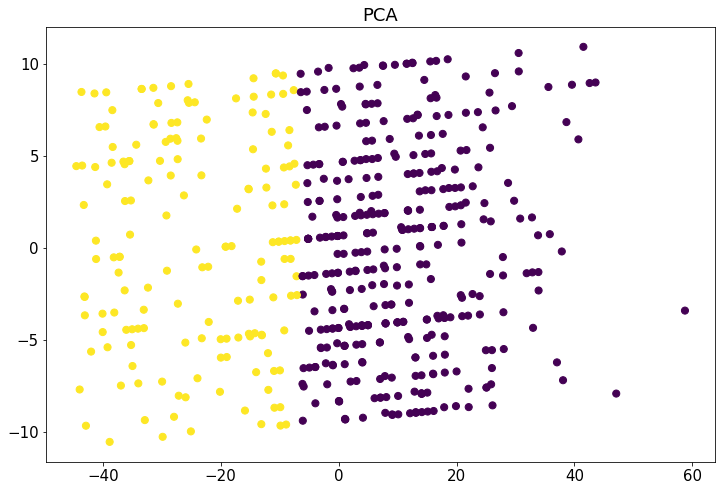

In [917]:
# сделаем визуализацию с помощью метода главных компонент

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
res = pca.fit_transform(feature_df)

plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=euclidean_churn.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [908]:
clean_df[clean_df['sqeuclidean_churn'] == 1].shape

(332, 27)

In [909]:
# проставим 1 для меньшего класса

if clean_df[clean_df['sqeuclidean_churn'] == 1].shape[0]>clean_df[clean_df['sqeuclidean_churn'] == 0].shape[0]:
    clean_df['best_cluster_churn'] = clean_df['sqeuclidean_churn'].apply(lambda x : 1 if x == 0 else 0)
    
else:
    clean_df['best_cluster_churn'] = clean_df['sqeuclidean_churn']

clean_df['best_cluster_churn'].value_counts()

0    332
1    199
Name: best_cluster_churn, dtype: int64

In [910]:
clean_df.to_csv('part_2.csv')

In [911]:
feature_df.to_csv('part_2_feature_df.csv')


In [912]:
feature_df

,able,able get,able help,able redeem,able watch,absolutely,absolutely horrendous,absolutely suck,acce,access,...,zip code,𝐋𝐄𝐀𝐃𝐄𝐑,location_proba,rfm,sin_time,cos_time,text_len,topic,fact,polarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.003766,331,-0.002982,0.999996,51,14,1,-0.150000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,331,-0.013453,0.999910,52,2,1,-0.125000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,333,-0.019634,0.999807,63,9,0,0.400000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,333,-0.020070,0.999799,50,5,1,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,333,-0.024287,0.999705,71,14,0,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.425612,333,-0.337369,0.941372,56,4,1,0.100000
527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001883,333,-0.338669,0.940905,25,2,1,0.000000
528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.105461,333,-0.341952,0.939717,50,11,0,0.411111
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.105461,333,-0.344616,0.938744,52,14,1,0.000000
